# Principal Component Analysis(PCA):360 DigiTMG
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables. PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models.

# Problem Statement: -
Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).


In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np   #math calcukations
import seaborn as sns  #advance visualizations

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


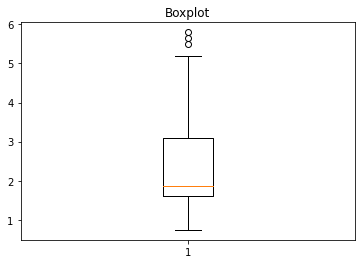

In [6]:
plt.boxplot(wine.Malic);plt.title('Boxplot');plt.show()  # outliers present


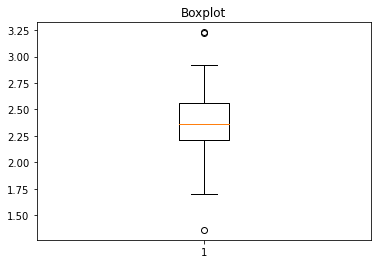

In [7]:
plt.boxplot(wine.Ash);plt.title('Boxplot');plt.show()  # outliers presentBalance


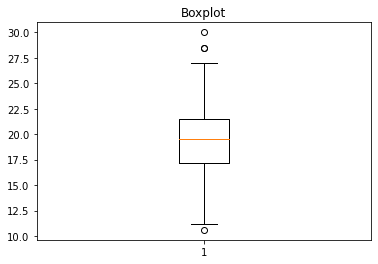

In [8]:
plt.boxplot(wine.Alcalinity);plt.title('Boxplot');plt.show()  # outliers presentBalance


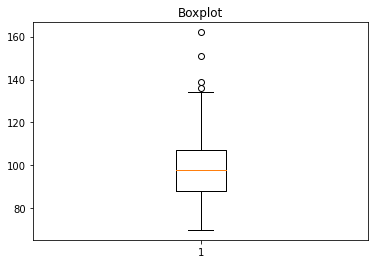

In [9]:
plt.boxplot(wine.Magnesium);plt.title('Boxplot');plt.show()  # outliers presentBalance


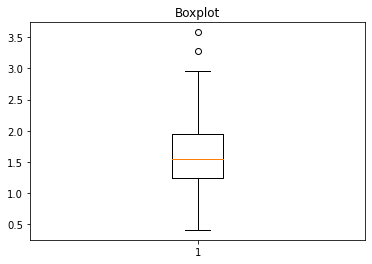

In [10]:
plt.boxplot(wine.Proanthocyanins);plt.title('Boxplot');plt.show()  # outliers presentBalance


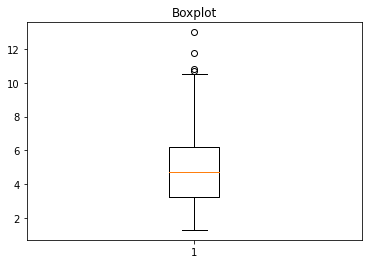

In [11]:
plt.boxplot(wine.Color);plt.title('Boxplot');plt.show()  # outliers presentBalance


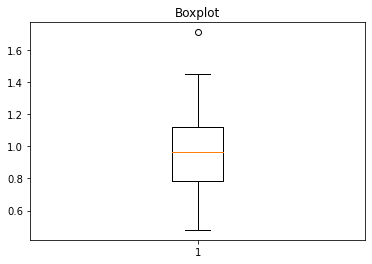

In [12]:
plt.boxplot(wine.Hue);plt.title('Boxplot');plt.show()  # outliers presentBalance


# Winsorization  is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. 

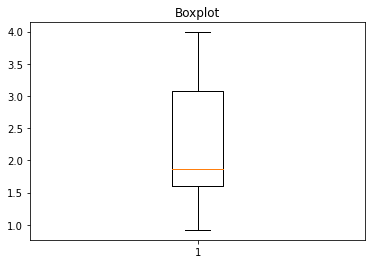

In [13]:
from scipy.stats.mstats import winsorize

wine['Malic']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Malic']);plt.title('Boxplot');plt.show()


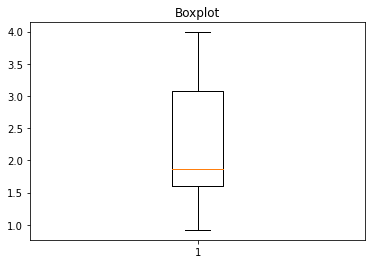

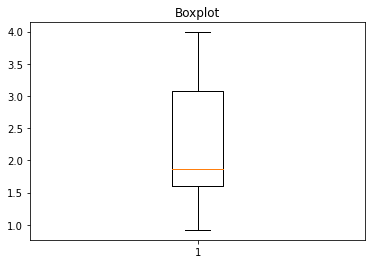

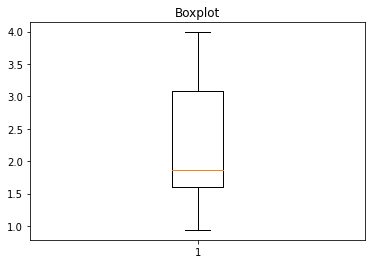

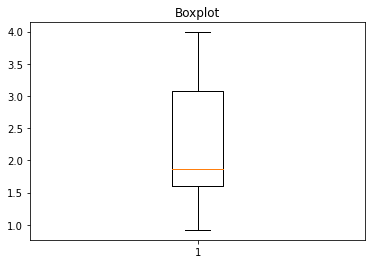

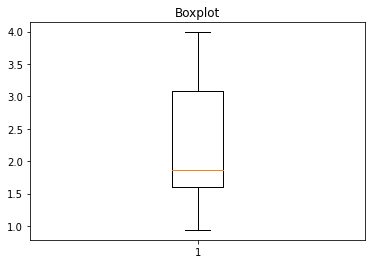

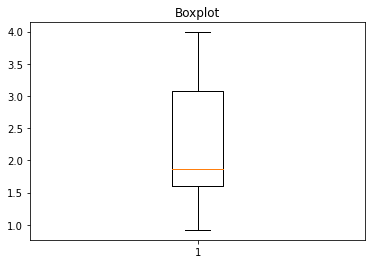

In [14]:
wine['Ash']=winsorize(wine.Malic,limits=[0.01, 0.099])   
plt.boxplot(wine['Ash']);plt.title('Boxplot');plt.show()

wine['Alcalinity']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Alcalinity']);plt.title('Boxplot');plt.show()

wine['Magnesium']=winsorize(wine.Malic,limits=[0.03, 0.097])   
plt.boxplot(wine['Magnesium']);plt.title('Boxplot');plt.show()

wine['Proanthocyanins']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Proanthocyanins']);plt.title('Boxplot');plt.show()

wine['Color']=winsorize(wine.Malic,limits=[0.03, 0.097])   
plt.boxplot(wine['Color']);plt.title('Boxplot');plt.show()

wine['Hue']=winsorize(wine.Malic,limits=[0.01, 0.099])   
plt.boxplot(wine['Hue']);plt.title('Boxplot');plt.show()

In [15]:
from sklearn import preprocessing   #package for normalize
wine_normalized = preprocessing.normalize(wine)
print(wine_normalized)


[[9.38860937e-04 1.33599911e-02 1.60545220e-03 ... 1.60545220e-03
  3.68033487e-03 9.99886898e-01]
 [9.52284353e-04 1.25701535e-02 1.69506615e-03 ... 1.69506615e-03
  3.23776680e-03 9.99898570e-01]
 [8.43809255e-04 1.11045298e-02 1.99138984e-03 ... 1.99138984e-03
  2.67487534e-03 9.99913967e-01]
 ...
 [3.59203612e-03 1.58887731e-02 4.77740803e-03 ... 4.77740803e-03
  1.86785878e-03 9.99783385e-01]
 [3.57083273e-03 1.56759557e-02 3.08281893e-03 ... 3.08281893e-03
  1.92824968e-03 9.99833165e-01]
 [5.35434561e-03 2.52189678e-02 7.12127966e-03 ... 7.12127966e-03
  2.85565099e-03 9.99477847e-01]]


Type              -1.322787
Alcohol           -0.852500
Malic             -0.951546
Ash               -0.951546
Alcalinity        -0.951546
Magnesium         -0.952482
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins   -0.951546
Color             -0.952482
Hue               -0.951546
Dilution          -1.086435
Proline           -0.248403
dtype: float64

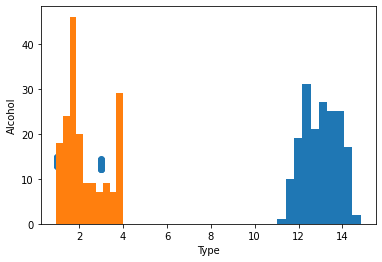

In [16]:
##########################Univariate, Bivariate################
plt.hist(wine["Alcohol"])   #Univariate

plt.hist(wine["Color"])

plt.scatter(wine["Type"], wine["Alcohol"]);plt.xlabel('Type');plt.ylabel('Alcohol')   #Bivariate

wine.skew(axis = 0, skipna = True) 

wine.kurtosis(axis = 0, skipna = True)


In [17]:
##################### Hierarchical Clustering ##########################
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

###Fidning Distance
z = linkage(wine_normalized, method = "complete", metric = "euclidean")


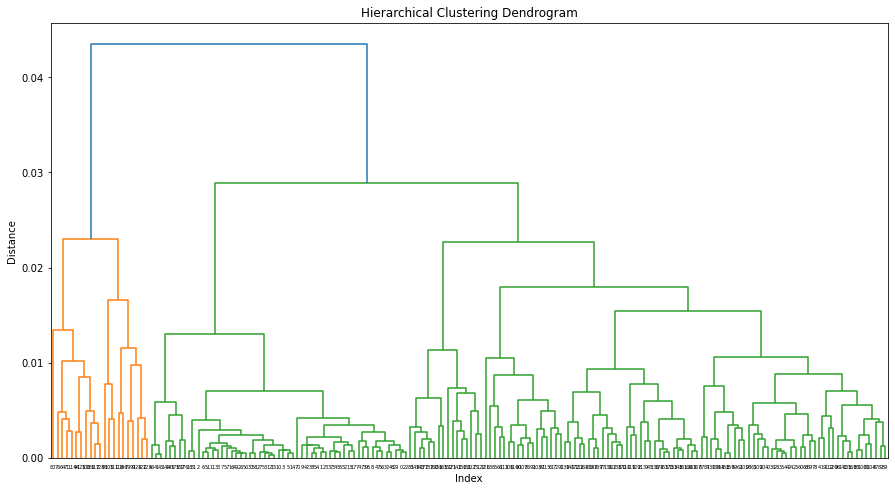

In [19]:
#####Dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )  
plt.show()


In [20]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(wine_normalized) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)


In [21]:
wine['clust'] = cluster_labels # creating a new column and assigning it to new column 

wine.head()

# Aggregate mean of each cluster
wine.iloc[:, 0:].groupby(wine.clust).mean()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,,
0,2.047619,12.499048,2.411429,2.411429,2.411429,2.413333,2.350476,2.244286,0.357619,2.411429,2.413333,2.411429,2.889048,362.142857,0
1,2.284314,12.762745,2.387549,2.387549,2.387549,2.387941,2.053039,1.604902,0.395686,2.387549,2.387941,2.387549,2.369412,610.166667,1
2,1.254545,13.633273,1.995455,1.995455,1.995455,1.995455,2.722909,2.734182,0.300727,1.995455,1.995455,1.995455,2.955091,1147.363636,2


     Type  Alcohol
0       1    14.23
1       1    13.20
2       1    13.16
3       1    14.37
4       1    13.24
..    ...      ...
173     3    13.71
174     3    13.40
175     3    13.27
176     3    13.17
177     3    14.13

[178 rows x 2 columns]


<AxesSubplot:xlabel='Type', ylabel='Alcohol'>

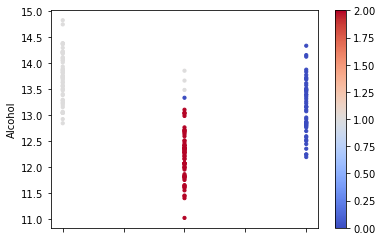

In [22]:
################################## K means clustering ########################

from sklearn.cluster import	KMeans
df_data = pd.DataFrame(wine,columns=['Type','Alcohol'])
print(df_data)
model1 = KMeans(n_clusters = 3).fit(df_data)
df_data.plot(x = "Type", y = "Alcohol", c = model1.labels_, kind="scatter", s = 10, cmap = plt.cm.coolwarm)


In [23]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(wine_normalized)
    TWSS.append(kmeans.inertia_)
    
TWSS

[0.008741723957442903,
 0.0058309900327630365,
 0.004450515365720012,
 0.003411618448410316,
 0.0027486410110211397,
 0.0022988626943913587,
 0.002076975927007789]

Text(0, 0.5, 'total_within_SS')

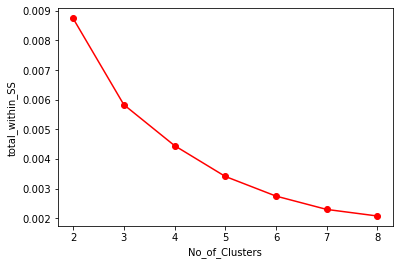

In [25]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [28]:
############# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(wine_normalized)
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
wine['clust'] = mb # creating a  new column and assigning it to new column 
wine.head()
wine.iloc[:, :].groupby(wine.clust).mean()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.387500,13.367625,1.860625,1.860625,1.860625,1.860625,2.63625,2.584625,0.318250,1.860625,1.860625,1.860625,2.944500,1021.462500
1,2.125000,12.573750,2.457500,2.457500,2.457500,2.459167,2.33000,2.139583,0.357917,2.457500,2.459167,2.457500,2.792500,372.833333
2,2.472973,12.742297,2.649865,2.649865,2.649865,2.650405,1.91500,1.393108,0.410270,2.649865,2.650405,2.649865,2.193243,571.378378


In [32]:
# creating a csv file 
wine.to_csv("wines.csv", encoding = "utf-8")


In [33]:

import os
os.getcwd()

'C:\\Users\\WELCOME\\Downloads\\PCA'

In [35]:
################################  PCA  ##############################################
wine = pd.read_csv("wines.csv")
wine.describe()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       178 non-null    int64  
 1   Type             178 non-null    int64  
 2   Alcohol          178 non-null    float64
 3   Malic            178 non-null    float64
 4   Ash              178 non-null    float64
 5   Alcalinity       178 non-null    float64
 6   Magnesium        178 non-null    float64
 7   Phenols          178 non-null    float64
 8   Flavanoids       178 non-null    float64
 9   Nonflavanoids    178 non-null    float64
 10  Proanthocyanins  178 non-null    float64
 11  Color            178 non-null    float64
 12  Hue              178 non-null    float64
 13  Dilution         178 non-null    float64
 14  Proline          178 non-null    int64  
 15  clust            178 non-null    int64  
dtypes: float64(12), int64(4)
memory usage: 22.4 KB


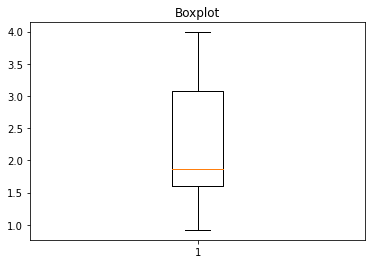

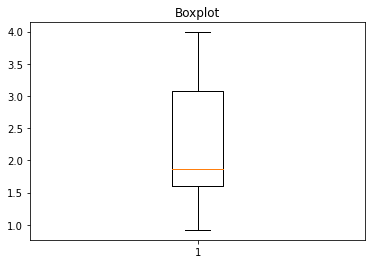

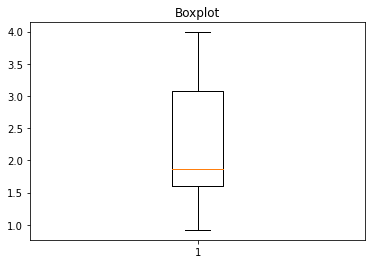

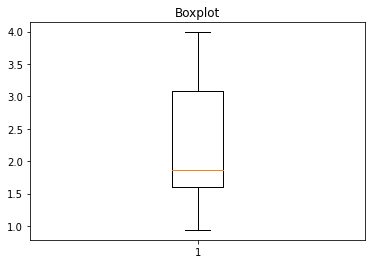

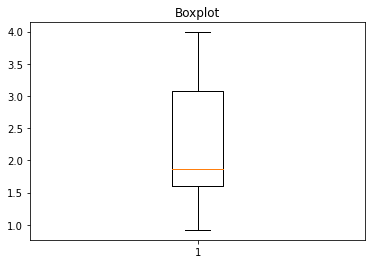

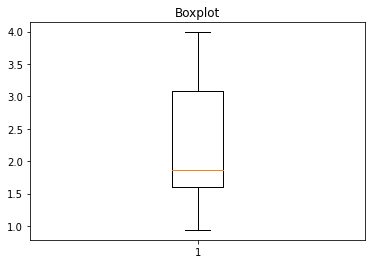

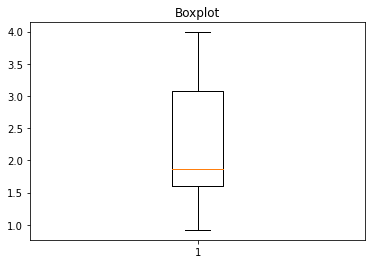

In [36]:
#############Winsorization########################
from scipy.stats.mstats import winsorize

wine['Malic']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Malic']);plt.title('Boxplot');plt.show()

wine['Ash']=winsorize(wine.Malic,limits=[0.01, 0.099])   
plt.boxplot(wine['Ash']);plt.title('Boxplot');plt.show()

wine['Alcalinity']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Alcalinity']);plt.title('Boxplot');plt.show()

wine['Magnesium']=winsorize(wine.Malic,limits=[0.03, 0.097])   
plt.boxplot(wine['Magnesium']);plt.title('Boxplot');plt.show()

wine['Proanthocyanins']=winsorize(wine.Malic,limits=[0.02, 0.098])   
plt.boxplot(wine['Proanthocyanins']);plt.title('Boxplot');plt.show()

wine['Color']=winsorize(wine.Malic,limits=[0.03, 0.097])   
plt.boxplot(wine['Color']);plt.title('Boxplot');plt.show()

wine['Hue']=winsorize(wine.Malic,limits=[0.01, 0.099])   
plt.boxplot(wine['Hue']);plt.title('Boxplot');plt.show()

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

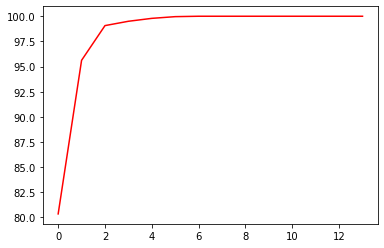

In [37]:

# Normalizing the numerical data 
wine_normal = scale(wine)
wine_normal

pca = PCA(n_components = 14)
pca_values = pca.fit_transform(wine_normalized)

# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

pca.components_
pca.components_[0]
# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")


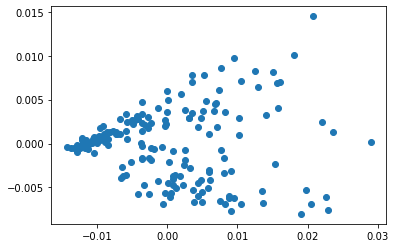

In [38]:
# PCA scores
pca_values


pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5","comp6","comp7","comp8","comp9","comp10","comp11","comp12","comp13"
final = pd.concat([wine, pca_data.iloc[:, 0:3]], axis = 1)

# Scatter diagram
plt.scatter(x = final.comp0, y = final.comp1)


In [39]:
##################### After PCA Hierarchical Clustering ##########################

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

###Fidning Distance
z = linkage(pca_data, method = "complete", metric = "euclidean")


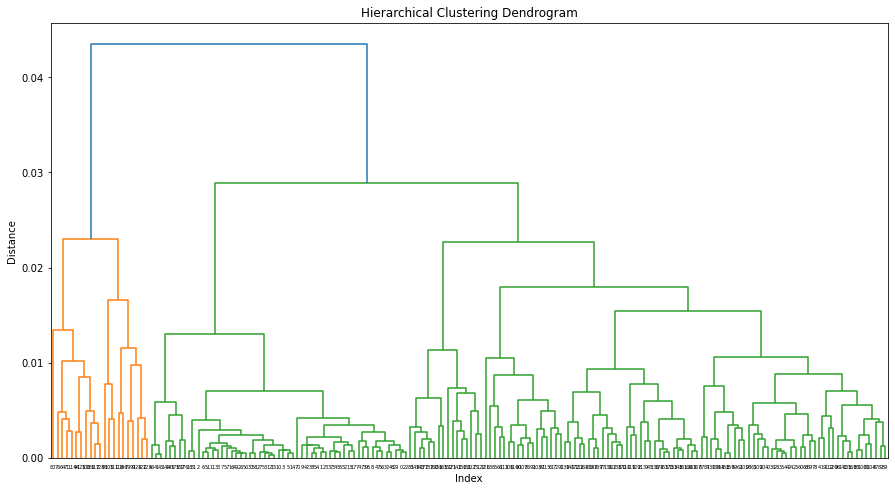

In [40]:
#####Dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )  
plt.show()


In [41]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(pca_data) 
h_complete.labels_

cluster_labels = pd.Series(h_complete.labels_)

pca_data['clust'] = cluster_labels

# Aggregate mean of each cluster
pca_data.iloc[:, 0:].groupby(pca_data.clust).mean()

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,clust
clust,,,,,,,,,,,,,,,
0,0.017586,0.002299,0.001517,0.000130,0.000178,-0.000076,-0.000020,0.000047,-3.760844e-07,3.350524e-20,1.072122e-22,2.729369e-22,6.651227e-23,8.217341e-38,0
1,0.001694,-0.000297,-0.000654,-0.000038,-0.000093,0.000029,0.000012,-0.000025,2.216857e-07,-5.290600e-21,2.078259e-21,3.250540e-22,9.379065e-23,9.947637e-38,1
2,-0.009856,-0.000327,0.000633,0.000022,0.000104,-0.000025,-0.000015,0.000028,-2.675304e-07,1.814058e-20,-8.079236e-22,1.111632e-22,8.960187e-23,2.756206e-37,2


In [42]:
################################## K means clustering ########################
##we can use air_normalized and air datasets to use.

from sklearn.cluster import	KMeans
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_data)
    TWSS.append(kmeans.inertia_)
    
TWSS


[17.4261195038939,
 0.0068857920921046615,
 0.004924790345054414,
 0.003846867377274171,
 0.0029211602878799546,
 0.002509788330356629,
 0.00218471312666794]

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13
clust,,,,,,,,,,,,,,
0,0.017586,0.002299,0.001517,0.000130,0.000178,-0.000076,-0.000020,0.000047,-3.760844e-07,3.350524e-20,1.072122e-22,2.729369e-22,6.651227e-23,8.217341e-38
1,0.001694,-0.000297,-0.000654,-0.000038,-0.000093,0.000029,0.000012,-0.000025,2.216857e-07,-5.290600e-21,2.078259e-21,3.250540e-22,9.379065e-23,9.947637e-38
2,-0.009856,-0.000327,0.000633,0.000022,0.000104,-0.000025,-0.000015,0.000028,-2.675304e-07,1.814058e-20,-8.079236e-22,1.111632e-22,8.960187e-23,2.756206e-37


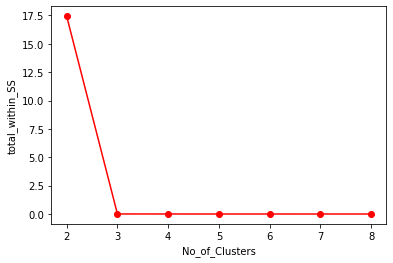

In [43]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

############# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(pca_data)
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
pca_data['clust'] = mb # creating a  new column and assigning it to new column 
pca_data.head()
pca_data.iloc[:, :].groupby(pca_data.clust).mean()


# Solution If we take K-means clustering, Cluster 3 for wine dataset.

Cluster 0 > Cluster > Cluster 1

If we take K means clustering, Cluster 3 people are more prone to heart disease

Cluster 3 > Cluster 1 > Cluster 2 > Cluster 4